In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats

In [2]:
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')

descripciones = {
    "ANO": "Año en que ocurrió el evento",
    "MES": "Mes en que ocurrió el evento",
    "DIA": "Día en que ocurrió el evento",
    "DEPTO": "Departamento donde ocurrió el evento",
    "AREA": "Área geográfica (urbana o rural)",
    "VIC_SEXO": "Sexo de la víctima",
    "VIC_EDAD": "Edad de la víctima",
    "VIC_EST_CIV": "Estado civil de la víctima",
    "VIC_ESCOLARIDAD": "Nivel educativo de la víctima",
    "VIC_REL_AGR": "Relación víctima–agresor",
    "TOTAL_HIJOS": "Número total de hijos de la víctima",
    "AGR_SEXO": "Sexo del agresor",
    "AGR_EDAD": "Edad del agresor",
    "AGR_GRUPET": "Grupo etario del agresor",
    "TIPAGRE": "Tipo de agresión",
    "LEY_APLICABLE": "Ley aplicada",
    "RECUR_DENUN": "Entidad donde se interpuso la denuncia",
    "TIPO_EVENTO": "Tipo de evento",
    "MUNICIPIO": "Código del municipio",
    "EDAD_HOM": "Edad del hombre (divorcios)",
    "EDAD_MUJ": "Edad de la mujer (divorcios)",
    "ETNIA_HOM": "Etnia del hombre",
    "ETNIA_MUJ": "Etnia de la mujer",
    "ESCOLARIDAD_HOM": "Escolaridad del hombre",
    "ESCOLARIDAD_MUJ": "Escolaridad de la mujer",
    "OCUPACION_HOM": "Ocupación del hombre",
    "OCUPACION_MUJ": "Ocupación de la mujer"
}

pd.DataFrame({
    "Variable": df.columns,
    "Tipo de dato": df.dtypes.astype(str),
    "Significado": [descripciones.get(col, "No especificado") for col in df.columns]
})

/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_22325/2563661824.py:1: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')


,Variable,Tipo de dato,Significado
ANO,ANO,float64,Año en que ocurrió el evento
MES,MES,object,Mes en que ocurrió el evento
DIA,DIA,float64,Día en que ocurrió el evento
DEPTO,DEPTO,object,Departamento donde ocurrió el evento
AREA,AREA,object,Área geográfica (urbana o rural)
VIC_SEXO,VIC_SEXO,object,Sexo de la víctima
VIC_EDAD,VIC_EDAD,float64,Edad de la víctima
VIC_EST_CIV,VIC_EST_CIV,object,Estado civil de la víctima
VIC_ESCOLARIDAD,VIC_ESCOLARIDAD,object,Nivel educativo de la víctima
VIC_REL_AGR,VIC_REL_AGR,object,Relación víctima–agresor


In [3]:
print("Cantidad de observaciones:", df.shape[0])
print("Cantidad de variables:", df.shape[1])
df.info()

Cantidad de observaciones: 389799
Cantidad de variables: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389799 entries, 0 to 389798
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ANO              389799 non-null  float64
 1   MES              389799 non-null  object 
 2   DIA              389798 non-null  float64
 3   DEPTO            389799 non-null  object 
 4   AREA             328765 non-null  object 
 5   VIC_SEXO         328765 non-null  object 
 6   VIC_EDAD         326105 non-null  float64
 7   VIC_EST_CIV      327258 non-null  object 
 8   VIC_ESCOLARIDAD  328117 non-null  object 
 9   VIC_REL_AGR      328765 non-null  object 
 10  TOTAL_HIJOS      265350 non-null  float64
 11  AGR_SEXO         328765 non-null  object 
 12  AGR_EDAD         315770 non-null  float64
 13  AGR_GRUPET       328765 non-null  object 
 14  TIPAGRE          328765 non-null  object 
 15  LEY_APLICABLE    169575 n

/var/folders/dc/_dt3fhrs48n2b_4mmncch3440000gp/T/ipykernel_22325/1813412716.py:2: DtypeWarning: Columns (1,3,4,5,7,8,9,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')


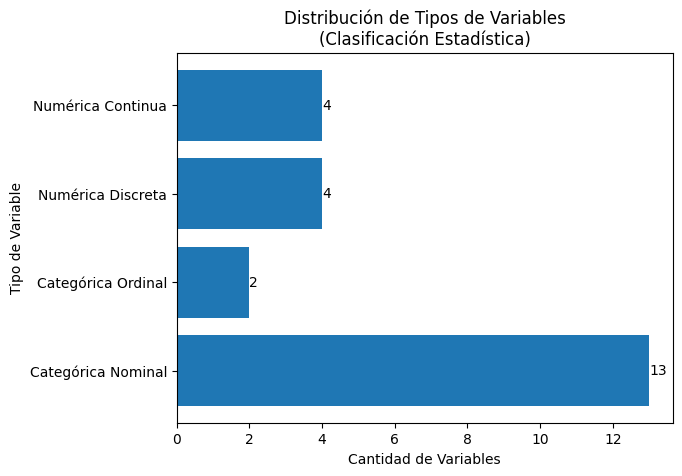

In [4]:
# Cargar dataset
df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';')

# Clasificación estadística de las variables
clasificacion = {
    "Categórica Nominal": [
        "MES","DEPTO","AREA","VIC_SEXO","VIC_EST_CIV","VIC_ESCOLARIDAD",
        "VIC_REL_AGR","AGR_SEXO","AGR_GRUPET","TIPAGRE","LEY_APLICABLE",
        "RECUR_DENUN","TIPO_EVENTO"
    ],
    "Categórica Ordinal": [
        "ESCOLARIDAD_HOM","ESCOLARIDAD_MUJ"
    ],
    "Numérica Discreta": [
        "ANO","DIA","TOTAL_HIJOS","MUNICIPIO"
    ],
    "Numérica Continua": [
        "VIC_EDAD","AGR_EDAD","EDAD_HOM","EDAD_MUJ"
    ]
}

# Contar variables por tipo
tipos = []
cantidades = []

for tipo, columnas in clasificacion.items():
    tipos.append(tipo)
    cantidades.append(len(columnas))

# Gráfico
plt.figure()
plt.barh(tipos, cantidades)
plt.xlabel("Cantidad de Variables")
plt.ylabel("Tipo de Variable")
plt.title("Distribución de Tipos de Variables\n(Clasificación Estadística)")

for i, v in enumerate(cantidades):
    plt.text(v, i, str(v), va='center')

plt.show()

## Exploración de variables numéricas

## Exploración de variables cuantitativas